# <span style = "color:IndianRed; font-size:40px"> Brain Tumor Detection (MRI)</span>

***

A Brain tumor is considered as one of the aggressive diseases, among children and adults. Brain tumors account for 85 to 90 percent of all primary Central Nervous System(CNS) tumors. Every year, around 11,700 people are diagnosed with a brain tumor. The 5-year survival rate for people with a cancerous brain or CNS tumor is approximately 34 percent for men and36 percent for women. Brain Tumors are classified as: Benign Tumor, Malignant Tumor, Pituitary Tumor, etc. Proper treatment, planning, and accurate diagnostics should be implemented to improve the life expectancy of the patients. The best technique to detect brain tumors is Magnetic Resonance Imaging (MRI). A huge amount of image data is generated through the scans. These images are examined by the radiologist. A manual examination can be error-prone due to the level of complexities involved in brain tumors and their properties.
Application of automated classification techniques using Machine Learning(ML) and Artificial Intelligence(AI)has consistently shown higher accuracy than manual classification. Hence, proposing a system performing detection and classification by using Deep Learning Algorithms using ConvolutionNeural Network (CNN), Artificial Neural Network (ANN), and TransferLearning (TL) would be helpful to doctors all around the world.

Brain Tumors are complex.  There are lot of abnormalities in the sizes and location of the brain tumor(s). This makes it really difficult for complete understanding of the nature of the tumor. Also, a professional Neurosurgeon is required for MRI analysis. Often times in developing countries the lack of skillful doctors and lack of knowledge about tumors makes it really challenging an time-consuming to generate reports from MRI. So an automated system can solve this problem.

***

You can find the dataset <a href = "https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri">here</a>

***

This code imports the necessary libraries and modules required for building the Brain Tumor Detection model with Transfer Learning using Efficientnetb0 v2.

* numpy is a Python library used for working with arrays. It provides various mathematical operations and functions for manipulating arrays.
* matplotlib is a Python library used for creating visualizations, such as graphs and charts.
* seaborn is a Python library used for creating more advanced visualizations and statistical graphics.
* tensorflow.keras is the deep learning library that provides various layers and models for building neural networks.
* sklearn.utils provides various utilities for working with scikit-learn, a Python library used for machine learning tasks.
* skimage.transform provides functions for resizing images.
* sklearn.metrics provides various metrics for evaluating the performance of machine learning models.
* glob is a Python module used for finding all the pathnames matching a specified pattern.
* tensorflow_hub is a library that provides various pre-trained models for transfer learning.
* tkinter is a Python module used for creating graphical user interfaces.

The code imports the required libraries, and no actual computation is performed yet.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential, layers
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import glob
import tensorflow_hub as hub
from tkinter import Tk, filedialog

This code uses the glob module to find all the pathnames matching the specified pattern. It creates four lists of file paths for each of the four classes of brain tumors in the Training directory: glioma, meningioma, no_tumor, and pituitary.

The *.jpg in each of the patterns is a wildcard that matches any file name that ends with .jpg.

The four lists will be used to load the images of each class into the model during training.

In [2]:
glioma = glob.glob('Training/glioma/*.jpg')
meningioma = glob.glob('Training/meningioma/*.jpg')
no_tumor = glob.glob('Training/notumor/*.jpg')
pituitary = glob.glob('Training/pituitary/*.jpg')

This code uses the glob module to find all the pathnames matching the specified pattern. It creates four lists of file paths for each of the four classes of brain tumors in the Testing directory: test_glioma, test_meningioma, test_no_tumor, and test_pituitary.

The *.jpg in each of the patterns is a wildcard that matches any file name that ends with .jpg.

The four lists will be used to load the images of each class into the model during testing.

In [3]:
test_glioma = glob.glob('Testing/glioma/*.jpg')
test_meningioma = glob.glob('Testing/meningioma/*.jpg')
test_no_tumor = glob.glob('Testing/notumor/*.jpg')
test_pituitary = glob.glob('Testing/pituitary/*.jpg')

This code prints the number of images in each class of the training set.

* len(glioma) returns the number of images in the glioma list.
* len(meningioma) returns the number of images in the meningioma list.
* len(no_tumor) returns the number of images in the no_tumor list.
* len(pituitary) returns the number of images in the pituitary list.

The output will show the number of images in each class.

In [4]:
print("Number of images in Training set are: \nGlioma:",len(glioma),"\nMeninglioma:", len(meningioma),"\nNo Tumor:", len(no_tumor),"\nPituitary:",len(pituitary))

Number of images in Training set are: 
Glioma: 1321 
Meninglioma: 1339 
No Tumor: 1595 
Pituitary: 1457


This code prints the number of images in each class of the testing set.

* len(test_glioma) returns the number of images in the test_glioma list.
* len(test_meningioma) returns the number of images in the test_meningioma list.
* len(test_no_tumor) returns the number of images in the test_no_tumor list.
* len(test_pituitary) returns the number of images in the test_pituitary list.

The output will show the number of images in each class of the testing set.

In [5]:
print("Number of images in Training set are: \nGlioma:",len(test_glioma),"\nMeninglioma:", len(test_meningioma),"\nNo Tumor:", len(test_no_tumor),"\nPituitary:",len(test_pituitary))

Number of images in Training set are: 
Glioma: 300 
Meninglioma: 306 
No Tumor: 405 
Pituitary: 300


This code loads the images from each class of the training set into memory and creates a corresponding label for each image. The images are loaded using the plt.imread function from the matplotlib library.

The code creates two empty lists, image and label, which will be populated with the loaded images and labels respectively.

For each class of brain tumor in the training set, the code iterates over all the file paths in the corresponding list (glioma, meningioma, pituitary, no_tumor), reads the image file into a NumPy array using plt.imread, appends the array to the image list, and appends the corresponding label to the label list.

The labels for the four classes are as follows:

* Glioma: 0
* Meningioma: 1
* Pituitary: 2
* No Tumor: 3

At the end of the loop, the image list will contain all the loaded images, and the label list will contain the corresponding labels for each image.

In [6]:
image = []
label = []

for i in glioma:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in meningioma:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in pituitary:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in no_tumor:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

This code loads the images from each class of the testing set into memory and creates a corresponding label for each image. The images are loaded using the plt.imread function from the matplotlib library.

The code creates two empty lists, image_test and label_test, which will be populated with the loaded images and labels respectively.

For each class of brain tumor in the testing set, the code iterates over all the file paths in the corresponding list (test_glioma, test_meningioma, test_pituitary, test_no_tumor), reads the image file into a NumPy array using plt.imread, appends the array to the image_test list, and appends the corresponding label to the label_test list.

The labels for the four classes are as follows:

* Glioma: 0
* Meningioma: 1
* Pituitary: 2
* No Tumor: 3

At the end of the loop, the image_test list will contain all the loaded images, and the label_test list will contain the corresponding labels for each image.

In [7]:
image_test = []
label_test = []

for i in test_glioma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

    
for i in test_meningioma:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)
    
for i in test_pituitary:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(2)
    
for i in test_no_tumor:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(3)

This code creates a dictionary classes that maps the integer class labels to their corresponding string names.

The sns.countplot() function from the seaborn library is then used to plot the number of images in each class of the training set. The y parameter specifies the values to be plotted on the y-axis, which are the class names retrieved from the classes dictionary by indexing the label list. The plot is displayed using plt.show().

The output is a horizontal bar plot showing the number of images in each class of the training set.

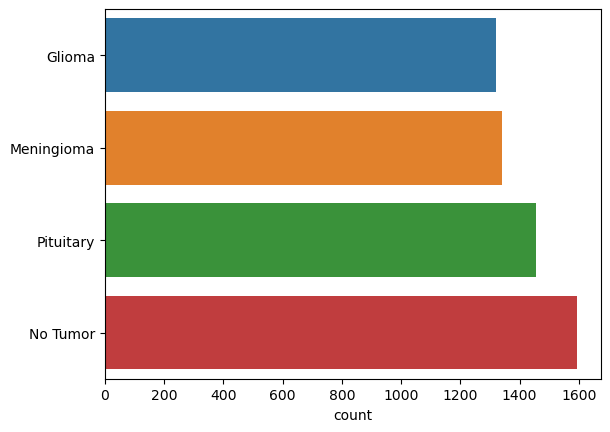

In [8]:
classes = {0:'Glioma', 1:'Meningioma', 2:'Pituitary', 3:'No Tumor'}
sns.countplot(y = [classes[i] for i in label])
plt.show()

This code shuffles the image and label lists randomly using the shuffle() function from the sklearn.utils library.

The random_state parameter sets the random seed for the shuffle, ensuring that the same shuffle order will be produced each time the code is run.

Shuffling the data is important because it prevents any systematic order or bias from affecting the training of the model.

In [9]:
image, label = shuffle(image,label, random_state = 100)

This code shuffles the image_test and label_test lists randomly using the shuffle() function from the sklearn.utils library.

The random_state parameter sets the random seed for the shuffle, ensuring that the same shuffle order will be produced each time the code is run.

Shuffling the data is important because it prevents any systematic order or bias from affecting the testing of the model.

In [10]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

This code creates a 3x4 grid of subplots and displays the first 12 images from the image list.

For each image, the code plots the image using plt.imshow and sets the subplot title to the corresponding class name using the plt.title function.

The if-elif-else statement checks the corresponding class label for each image and sets the title accordingly.

The plt.figure(figsize = (20,20)) function sets the size of the figure to be 20x20 inches.

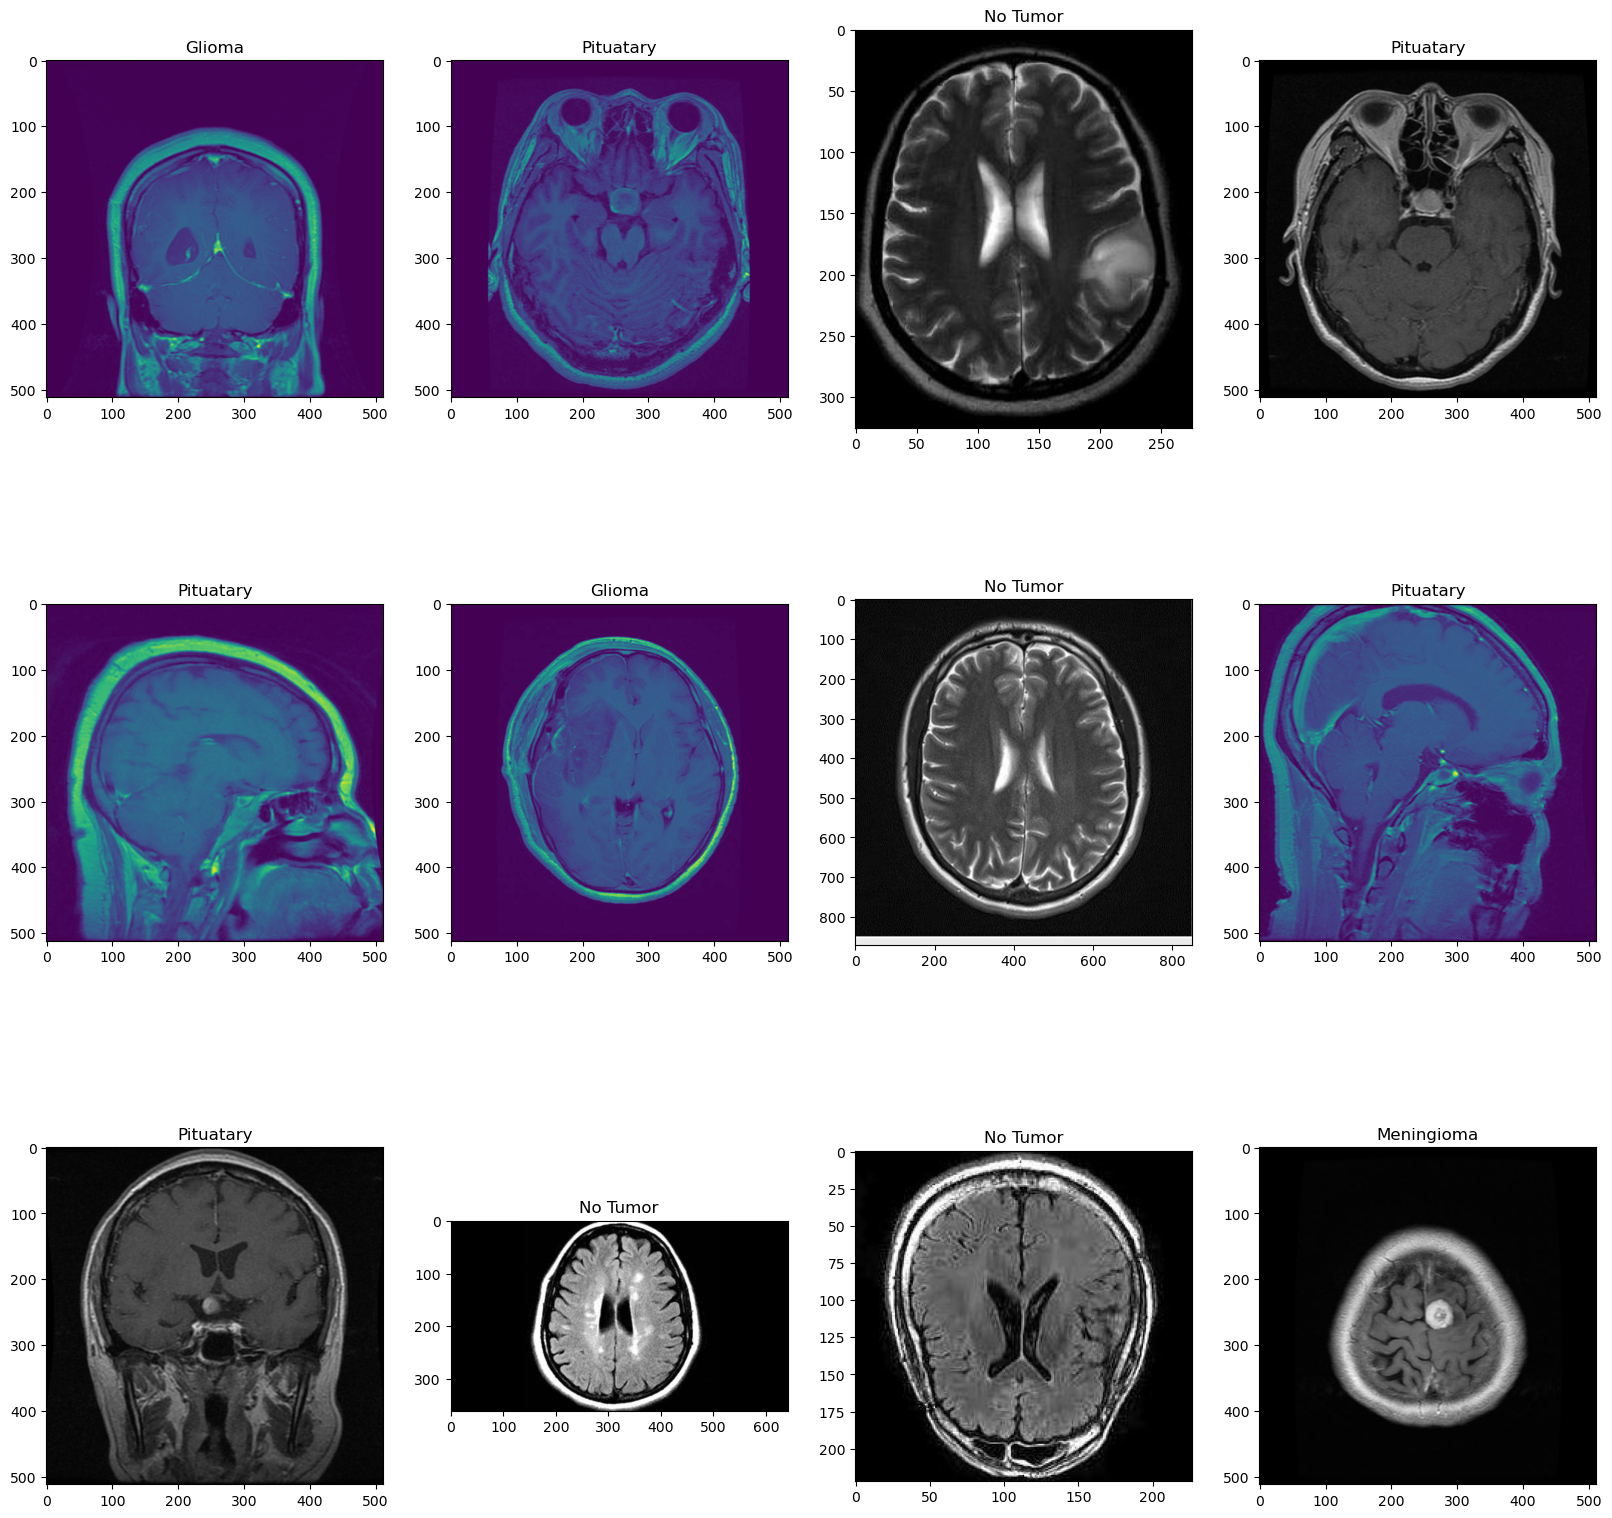

In [11]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 0:
        plt.title('Glioma')
    elif label[i] == 1:
        plt.title('Meningioma')
    elif label[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

This code prints the shape of the first 10 images in the image list using a for loop.

The shape property of a NumPy array returns the dimensions of the array in the form of a tuple. For example, if an array has shape (height, width, channels), the tuple will have three values representing the height, width, and number of color channels (such as 3 for RGB or 1 for grayscale).

The output will show the shape of each of the 10 images in the image list.

In [12]:
for i in range(10):
    print(image[i].shape)

(512, 512)
(512, 512)
(326, 276, 3)
(512, 512, 3)
(512, 512)
(512, 512)
(872, 850, 3)
(512, 512)
(512, 512, 3)
(361, 642, 3)


This code resizes each image in the image list to a uniform size of (224,224,3) using the resize() function from the skimage.transform library.

The resized images are appended to a new list X_train.

Finally, the X_train list is converted to a NumPy array using np.array().

The output will be a NumPy array X_train containing all the resized images.

In [13]:
X_train = []

for i in image:
    X_train.append(resize(i,(224,224,3)))
    
X_train = np.array(X_train)

This code resizes each image in the image_test list to a uniform size of (224,224,3) using the resize() function from the skimage.transform library.

The resized images are appended to a new list X_test.

Finally, the X_test list is converted to a NumPy array using np.array().

The output will be a NumPy array X_test containing all the resized images for testing.

In [14]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(224,224,3)))
    
X_test = np.array(X_test)

This code clears the image and image_test lists to free up memory.

Since the resized images are already stored in the X_train and X_test NumPy arrays, the original images in image and image_test are no longer needed and can be safely cleared from memory to avoid memory overflow.

In [15]:
# These code is done to save memory
image = []
image_test = []

This code creates two NumPy arrays y_train and y_test containing the labels for the training and testing sets, respectively.

The np.array() function converts the label and label_test lists to NumPy arrays.

These arrays will be used to train and evaluate the model during training and testing, respectively.

In [16]:
y_train = np.array(label)
y_test = np.array(label_test)

This code creates a 3x4 grid of subplots and displays the first 12 images from the X_train array, which contains the resized images.

For each image, the code plots the image using plt.imshow and sets the subplot title to the corresponding class name using the plt.title function.

The if-elif-else statement checks the corresponding class label for each image and sets the title accordingly.

The plt.figure(figsize = (20,20)) function sets the size of the figure to be 20x20 inches.

The images are plotted again after the resizing

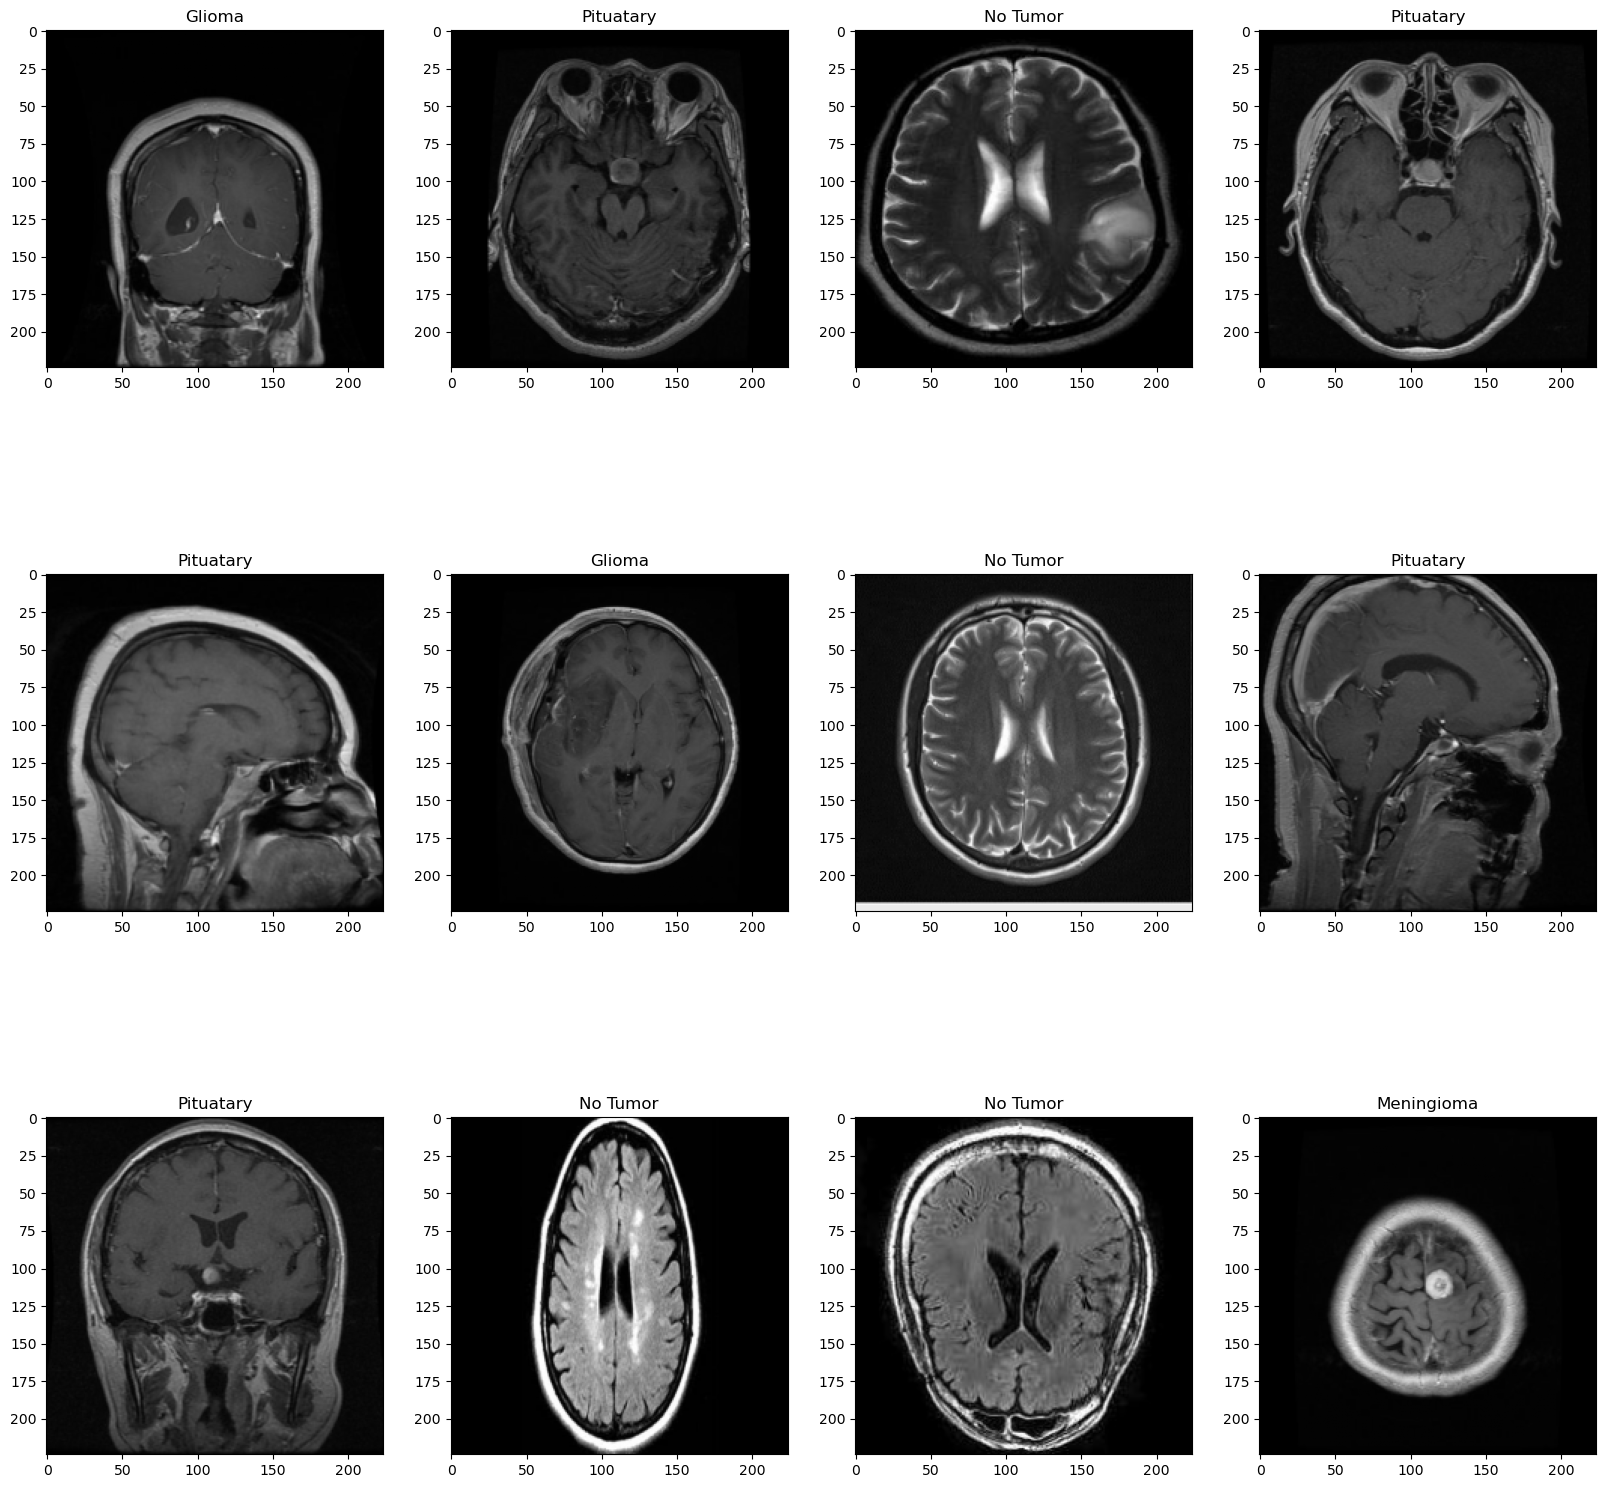

In [17]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 0:
        plt.title('Glioma')
    elif label[i] == 1:
        plt.title('Meningioma')
    elif label[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

This code prints the shape of the X_train, X_test, y_train, and y_test arrays.

The shape property of a NumPy array returns the dimensions of the array in the form of a tuple. For example, if an array has shape (height, width, channels), the tuple will have three values representing the height, width, and number of color channels (such as 3 for RGB or 1 for grayscale).

The output will show the shape of each of the four arrays.

In [18]:
print("Shape of X_train is:", X_train.shape)
print("Shape of X_test is:", X_test.shape)
print("Shape of y_train is:", y_train.shape)
print("Shape of y_test is:", y_test.shape)

Shape of X_train is: (5712, 224, 224, 3)
Shape of X_test is: (1311, 224, 224, 3)
Shape of y_train is: (5712,)
Shape of y_test is: (1311,)


This code defines a Sequential model for brain tumor detection using convolutional neural networks (CNNs).

The model consists of several layers:

* layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)): This is the first convolutional layer with 16 filters of size 3x3, using the ReLU activation function. The input_shape parameter specifies the shape of the input images, which is (224,224,3) for this model.
* layers.MaxPool2D(2,2): This is the first max pooling layer with a pool size of 2x2.
* layers.Conv2D(32,(3,3), activation = 'relu'): This is the second convolutional layer with 32 filters of size 3x3, using the ReLU activation function.
* layers.MaxPool2D(2,2): This is the second max pooling layer with a pool size of 2x2.
* layers.Flatten(): This layer flattens the output of the previous layer into a 1D vector, which is needed for the fully connected layers.
* layers.Dense(4, activation = 'sigmoid'): This is the output layer with 4 neurons, one for each class, and the sigmoid activation function to output the class probabilities.


In [38]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPool2D(2,2),
    
    layers.Conv2D(32, (3,3), activation = 'relu'),
    layers.MaxPool2D(2,2),
    
    layers.Flatten(),
    
    layers.Dense(4, activation = 'sigmoid')
])

This code compiles the model using the compile() function.

The optimizer parameter specifies the optimization algorithm used during training. In this case, we are using the Adagrad optimizer, which is an adaptive learning rate optimization algorithm that is commonly used for training deep neural networks.

The loss parameter specifies the loss function used to compute the error during training. In this case, we are using the sparse categorical crossentropy loss, which is suitable for multi-class classification problems where the classes are mutually exclusive.

The metrics parameter specifies the evaluation metric used to measure the performance of the model during training and testing. In this case, we are using accuracy, which is the fraction of correctly classified images.

In [39]:
model.compile(optimizer = 'adagrad',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

This code prints a summary of the model using the summary() function.

The summary displays a table of the layers in the model, including their names, output shape, number of parameters, and connection types.

The summary also displays the total number of parameters in the model, which is an important factor in determining the size and complexity of the model.

The output will show the summary of the model.

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 93312)             0         
                                                                 
 dense_4 (Dense)             (None, 4)                

This code trains the model using the fit() function.

The X_train and y_train arrays are used for training. The epochs parameter specifies the number of times the model will iterate over the entire training set. In this case, we are using 15 epochs.

The validation_split parameter specifies the fraction of the training data to be used as validation data. In this case, we are using 5% of the training data as validation data.

During training, the model updates its weights and biases to minimize the loss function specified in the compile() function using the backpropagation algorithm.

The output will show the training progress for each epoch, including the loss and accuracy on both the training and validation sets.

In [49]:
model.fit(X_train,y_train, epochs=15, validation_split=0.05)

Epoch 1/15
90/90 [==============================] - 131s 1s/step - loss: 1.1696 - accuracy: 0.4615 - val_loss: 1.0104 - val_accuracy: 0.6012
Epoch 2/15
90/90 [==============================] - 107s 1s/step - loss: 0.9321 - accuracy: 0.6411 - val_loss: 1.0931 - val_accuracy: 0.4804
Epoch 3/15
90/90 [==============================] - 78s 870ms/step - loss: 0.8254 - accuracy: 0.6842 - val_loss: 0.8045 - val_accuracy: 0.6719
Epoch 4/15
90/90 [==============================] - 84s 932ms/step - loss: 0.7554 - accuracy: 0.7045 - val_loss: 0.7572 - val_accuracy: 0.7073
Epoch 5/15
90/90 [==============================] - 81s 902ms/step - loss: 0.7045 - accuracy: 0.7332 - val_loss: 0.9033 - val_accuracy: 0.6376
Epoch 6/15
90/90 [==============================] - 89s 992ms/step - loss: 0.6717 - accuracy: 0.7440 - val_loss: 0.7501 - val_accuracy: 0.6957
Epoch 7/15
90/90 [==============================] - 83s 926ms/step - loss: 0.6403 - accuracy: 0.7616 - val_loss: 0.6588 - val_accuracy: 0.7465
Epo

This code evaluates the trained model on the training data using the evaluate() function.

The X_train and y_train arrays are used for evaluation.

The output will show the evaluation results, including the loss and accuracy on the training set.

In [50]:
model.evaluate(X_train, y_train)

179/179 [==============================] - 27s 149ms/step - loss: 0.4983 - accuracy: 0.8267


[0.4982747435569763, 0.8266806602478027]

This code uses the trained model to make predictions on the testing set X_test using the predict() function.

The predict() function returns a NumPy array containing the predicted class probabilities for each image in the X_test array.

The output will be a NumPy array prediction containing the predicted class probabilities for each image in the testing set.

In [51]:
prediction = model.predict(X_test)

41/41 [==============================] - 17s 194ms/step


This code converts the predicted class probabilities in prediction to class labels using the np.argmax() function.

For each image in the prediction array, np.argmax() returns the index of the class with the highest predicted probability. This index corresponds to the class label in the range of 0 to 3.

The output will be a list y_pred containing the predicted class labels for each image in the testing set.

In [52]:
y_pred = [np.argmax(i) for i in prediction]

This code creates a 3x4 grid of subplots and displays the first 12 images from the testing set X_test and shows our Predicted labels

For each image, the code plots the image using plt.imshow() and sets the subplot title to the predicted class label using the plt.title() function.

The if-elif-else statement checks the predicted class label for each image and sets the title accordingly.

The plt.figure(figsize = (20,20)) function sets the size of the figure to be 20x20 inches.

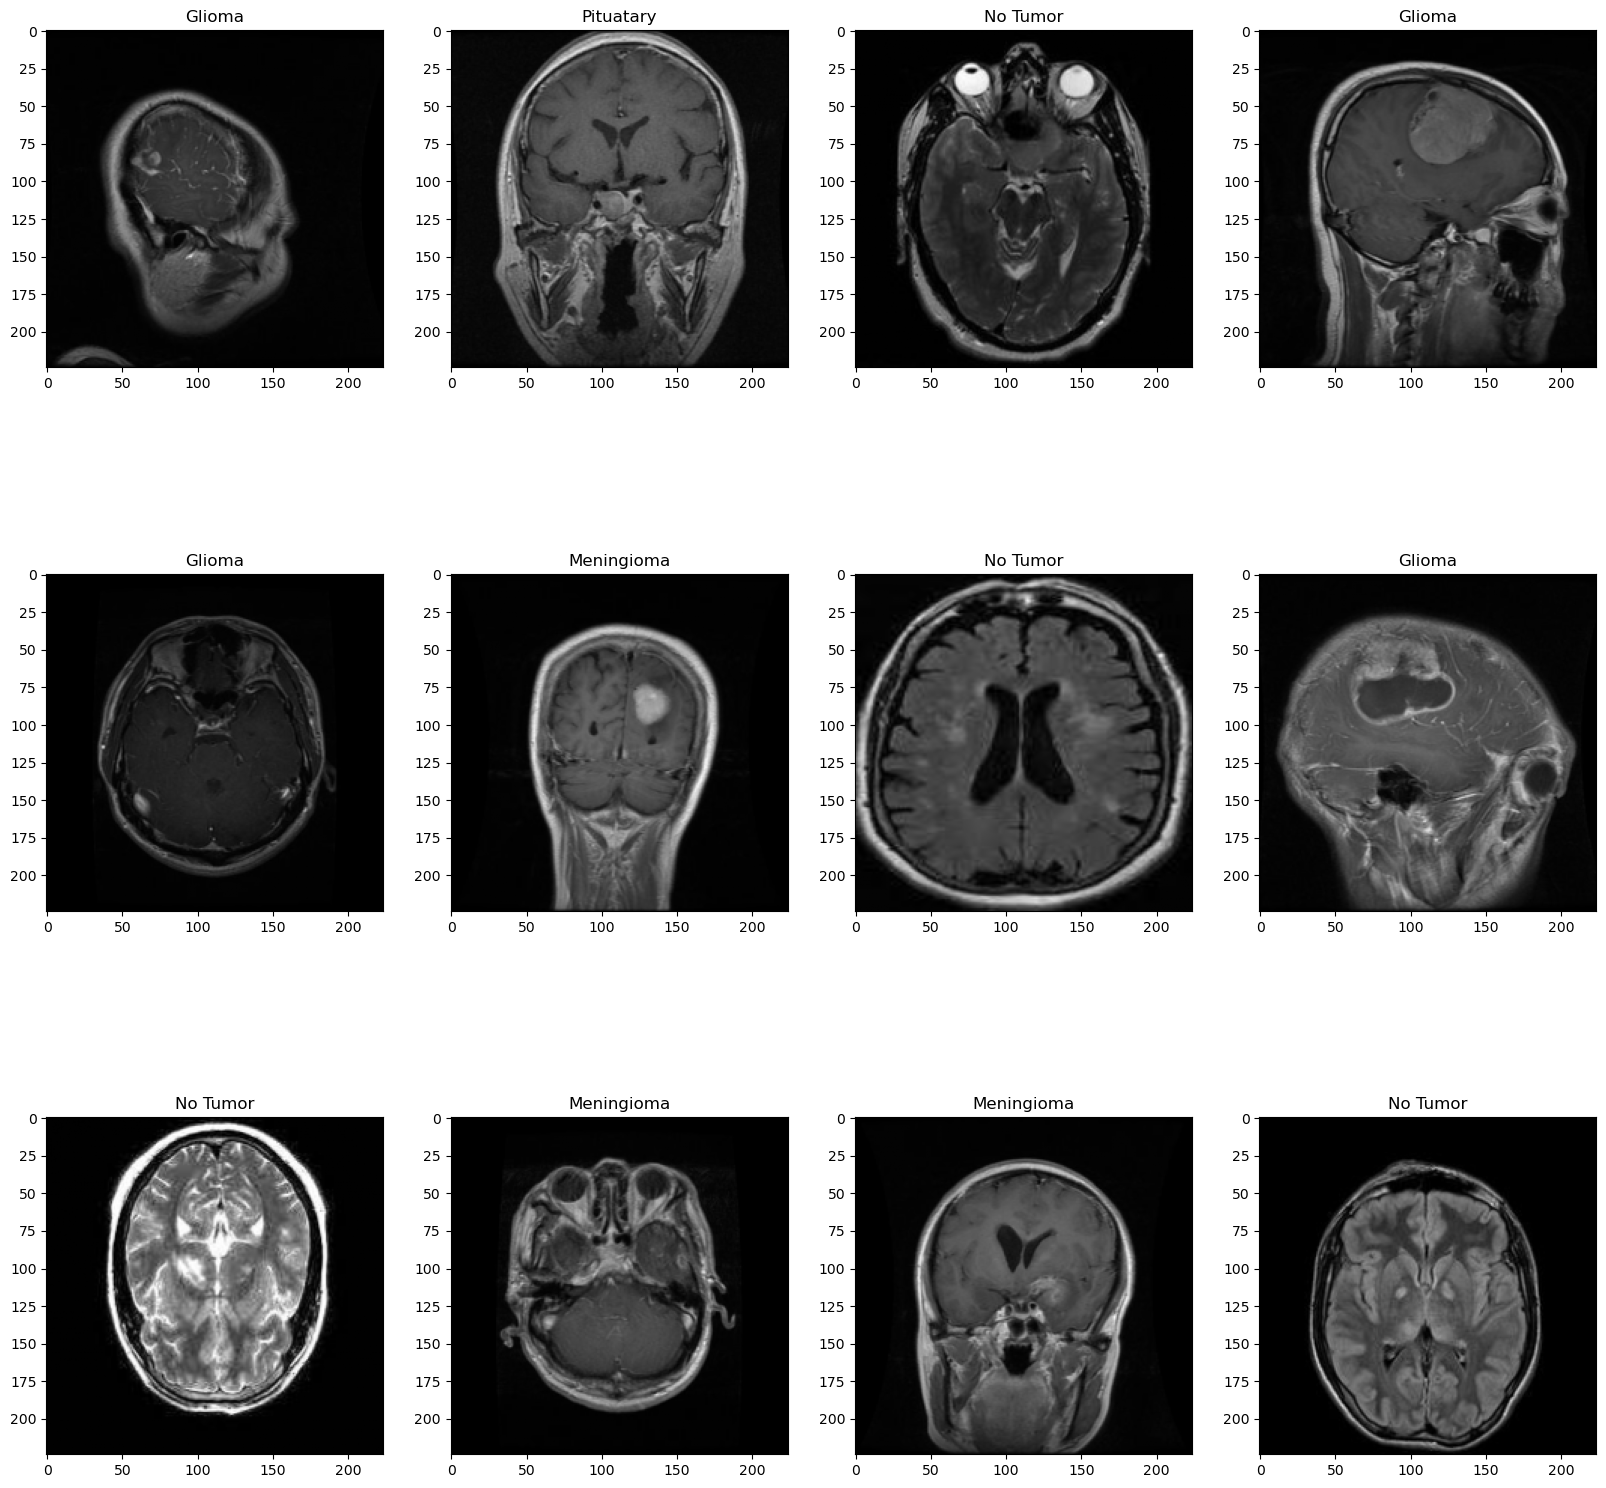

In [53]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i] == 0:
        plt.title('Glioma')
    elif y_pred[i] == 1:
        plt.title('Meningioma')
    elif y_pred[i] == 2:
        plt.title('Pituatary')
    else:
        plt.title('No Tumor')

This code creates a confusion matrix heatmap using the confusion_matrix() function from scikit-learn and the heatmap() function from the seaborn library.

The confusion_matrix() function takes the true labels y_test and predicted labels y_pred as input and returns a confusion matrix as a NumPy array.

The heatmap() function takes the confusion matrix as input and creates a heatmap visualization of the matrix. The annot=True parameter displays the numerical values in each cell, and the fmt='d' parameter formats the values as integers.

The output will show the confusion matrix heatmap, which displays the number of true positive, false positive, false negative, and true negative predictions for each class.

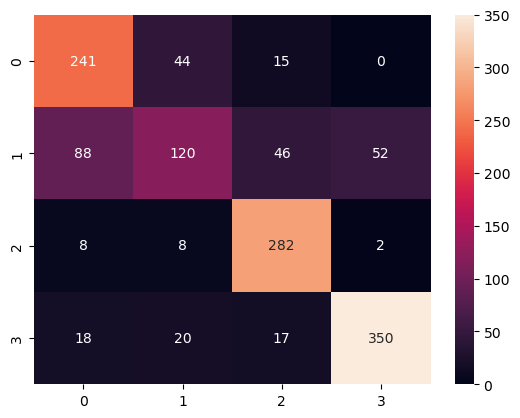

In [54]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

This code calculates the accuracy of the model on the testing set using the accuracy_score() function from scikit-learn.

The accuracy_score() function takes the true labels y_test and predicted labels y_pred as input and returns the accuracy of the predictions as a float value between 0 and 1.

The output will show the accuracy of the model on the testing set.

In [55]:
accuracy_score(y_test,y_pred)

0.7574370709382151

This code prints a classification report for the model using the classification_report() function from scikit-learn.

The classification_report() function takes the true labels y_test and predicted labels y_pred as input and returns a report of precision, recall, F1-score, and support for each class.

Precision is the number of true positive predictions divided by the number of true positive and false positive predictions. It represents the proportion of positive predictions that are correct.

Recall is the number of true positive predictions divided by the number of true positive and false negative predictions. It represents the proportion of actual positives that are correctly predicted.

The F1-score is the harmonic mean of precision and recall, which gives equal weight to both measures.

The support is the number of actual occurrences of the class in the test set.

The output will show the classification report for the model on the testing set, including precision, recall, F1-score, and support for each class.

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.80      0.74       300
           1       0.62      0.39      0.48       306
           2       0.78      0.94      0.85       300
           3       0.87      0.86      0.87       405

    accuracy                           0.76      1311
   macro avg       0.74      0.75      0.73      1311
weighted avg       0.75      0.76      0.74      1311



***

### efficientnetb0_v2

This code defines the URL for the EfficientNetB0 version 2 pre-trained model available on TensorFlow Hub.

The URL points to the feature vector module of the pre-trained model, which is a fixed feature extractor that converts images to a 1280-dimensional feature vector.

The feature vector can be used as input to a custom classification layer, allowing the pre-trained model to be fine-tuned for a specific task.

In [68]:
efficientnetb0_v2_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

This code loads the pre-trained EfficientNetB0 version 2 model from TensorFlow Hub using the hub.load() function.

The hub.load() function takes the URL of the pre-trained model as input and returns a Keras layer that can be used in a custom model.

The pre-trained EfficientNetB0 version 2 model is capable of classifying images into 1000 different classes based on the ImageNet dataset, and the pre-trained weights are available to download and use in TensorFlow Hub.

In [72]:
hub.load(efficientnetb0_v2_url)

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x20c13d99ab0>

This code defines a Keras layer using the hub.KerasLayer() function, which represents the pre-trained EfficientNetB0 version 2 model without the top classification layer.

The hub.KerasLayer() function takes the URL of the pre-trained model as input and returns a Keras layer that can be used in a custom model.

The input_shape parameter specifies the shape of the input images expected by the pre-trained model. In this case, the input images have a shape of (224,224,3).

The trainable parameter specifies whether the pre-trained weights of the model should be trainable or frozen during training. In this case, the pre-trained weights are set to non-trainable.

In [88]:
pretrained_model_without_top_layer = hub.KerasLayer(
    efficientnetb0_v2_url, input_shape = (224,224,3), trainable = False
)

This code defines a custom model eff_model using the Sequential model API from Keras.

The pretrained_model_without_top_layer layer defined previously is used as the first layer of the model, representing the pre-trained EfficientNetB0 version 2 model without the top classification layer.

The layers.Dense() function is used to add two fully connected layers to the model, each with a specified number of neurons and activation function. Dropout layers are also added after each dense layer to reduce overfitting.

The final dense layer has 4 neurons, representing the 4 classes in the tumor detection problem, and uses a sigmoid activation function to output a probability distribution over the classes.

The output will show the architecture of the eff_model with the number of parameters in each layer.

In [92]:
eff_model = Sequential([
    pretrained_model_without_top_layer,
    
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.Dense(4, activation = 'sigmoid')
])

This code compiles the eff_model using the compile() function from Keras.

The compile() function takes three arguments:

* optimizer: the optimization algorithm used during training, which updates the weights of the model to minimize the loss
loss: the loss function used during training, which measures the error between the predicted and true labels
* metrics: the evaluation metric used during training, which measures the performance of the model on the training and validation data

In this case, the Adam optimizer is used with a sparse categorical cross-entropy loss function and accuracy metric.

In [93]:
eff_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

This code trains the eff_model using the fit() function from Keras.

The fit() function takes several arguments:

X_train: the training images
y_train: the training labels
epochs: the number of times to iterate over the entire training set
validation_split: the proportion of the training set to use for validation
During training, the eff_model will update its weights to minimize the loss between the predicted and true labels on the training set. The accuracy and loss on both the training and validation sets will be displayed after each epoch.

The output will show the training progress of the eff_model, including the loss and accuracy on the training and validation sets for each epoch.

In [94]:
eff_model.fit(X_train,y_train, epochs = 15, validation_split = 0.05)

Epoch 1/15
170/170 [==============================] - 221s 1s/step - loss: 0.5083 - accuracy: 0.8010 - val_loss: 0.3209 - val_accuracy: 0.8706
Epoch 2/15
170/170 [==============================] - 218s 1s/step - loss: 0.2945 - accuracy: 0.8933 - val_loss: 0.2871 - val_accuracy: 0.8986
Epoch 3/15
170/170 [==============================] - 210s 1s/step - loss: 0.2413 - accuracy: 0.9180 - val_loss: 0.2652 - val_accuracy: 0.9161
Epoch 4/15
170/170 [==============================] - 222s 1s/step - loss: 0.1937 - accuracy: 0.9272 - val_loss: 0.2142 - val_accuracy: 0.9301
Epoch 5/15
170/170 [==============================] - 232s 1s/step - loss: 0.1666 - accuracy: 0.9394 - val_loss: 0.2044 - val_accuracy: 0.9266
Epoch 6/15
170/170 [==============================] - 225s 1s/step - loss: 0.1380 - accuracy: 0.9495 - val_loss: 0.2011 - val_accuracy: 0.9441
Epoch 7/15
170/170 [==============================] - 229s 1s/step - loss: 0.1382 - accuracy: 0.9497 - val_loss: 0.2243 - val_accuracy: 0.9336

This code uses the predict() function of the eff_model to make predictions on the testing set X_test.

The predict() function takes the input images as input and returns the predicted probability distribution over the classes for each image.

The output will be a NumPy array of shape (num_samples, num_classes) containing the predicted probabilities for each image and class.

In [95]:
y_pred = eff_model.predict(X_test)

41/41 [==============================] - 42s 965ms/step


This code converts the predicted probability distribution returned by the eff_model into a single predicted label for each image using the argmax() function from NumPy.

The argmax() function returns the index of the maximum value in a NumPy array, which corresponds to the predicted class label with the highest probability.

The output will be a list of predicted labels for the testing set, with one label for each image.

In [97]:
y_pred = [np.argmax(i) for i in y_pred]

This code uses the accuracy_score() function from scikit-learn to calculate the accuracy of the eff_model on the testing set.

The accuracy_score() function takes the true labels y_test and predicted labels y_pred as input and returns the fraction of correctly classified samples.

The output will be a floating-point number between 0 and 1, representing the accuracy of the eff_model on the testing set.

In [98]:
accuracy_score(y_test,y_pred)

0.9633867276887872

This code uses the confusion_matrix() function from scikit-learn to calculate the confusion matrix of the eff_model on the testing set.

The confusion matrix is a square matrix of size (num_classes, num_classes) that shows the number of true positive, false positive, true negative, and false negative predictions for each class.

The sns.heatmap() function from Seaborn is then used to visualize the confusion matrix as a heatmap, with the true labels on the y-axis and predicted labels on the x-axis. The annot=True parameter adds the count of each cell to the heatmap, and fmt='d' specifies the format of the cell values as integers.

The output will be a heatmap visualizing the confusion matrix of the eff_model on the testing set.

<Axes: >

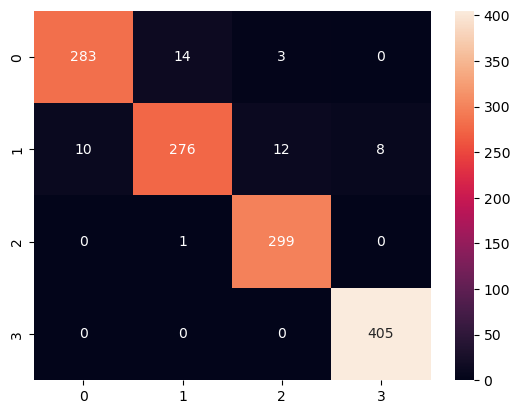

In [101]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')

This code uses the classification_report() function from scikit-learn to generate a classification report for the eff_model on the testing set.

The classification_report() function takes the true labels y_test and predicted labels y_pred as input and returns a text report showing the precision, recall, F1 score, and support for each class.

Precision is the fraction of true positive predictions out of all positive predictions. Recall is the fraction of true positive predictions out of all true positive samples. The F1 score is the harmonic mean of precision and recall. The support is the number of samples in each class.

The output will be a text report showing the precision, recall, F1 score, and support for each class, as well as the weighted averages of these metrics.

In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       300
           1       0.95      0.90      0.92       306
           2       0.95      1.00      0.97       300
           3       0.98      1.00      0.99       405

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



This code defines a function Make_Prediction() that allows the user to select an image file using a file dialog.

The Tk() function from the tkinter library is used to create a top-level window for the file dialog, and the filedialog.askopenfilename() function is used to display a dialog for selecting a file with the file extension .jpg. The selected file path is stored in the file_path variable.

The plt.imread() function from Matplotlib is used to read the selected image file into a NumPy array. The image is then resized to a shape of (224,224,3) using the resize() function from scikit-image and appended to a list images.

The Make_Prediction() function then converts the images list into a NumPy array and uses the predict() function of the eff_model to generate predicted probability distributions for each image.

The predicted probability distributions are then converted into predicted class labels using a dictionary classes, which maps class indices to class labels.

Finally, the original image is displayed using the imshow() function from Matplotlib, and the predicted class label is displayed as the title of the plot using the title() function.

Note: This function assumes that the classes dictionary has already been defined and that the eff_model has been trained and loaded into memory.

In [117]:
def Make_Prediction():
    root = Tk()
    file_path = filedialog.askopenfilename(filetypes=[("Image files", ".jpg")])
    root.withdraw()
    
    images = []
    img = plt.imread(file_path)
    img = resize(img, (224,224,3))
    images.append(img)
        
    images = np.array(images)
    predictions = eff_model.predict(images)
    predictions = [classes[np.argmax(i)] for i in predictions]
    plt.imshow(img)
    plt.title(f"Predicted = {predictions[0]}")

1/1 [==============================] - 0s 261ms/step


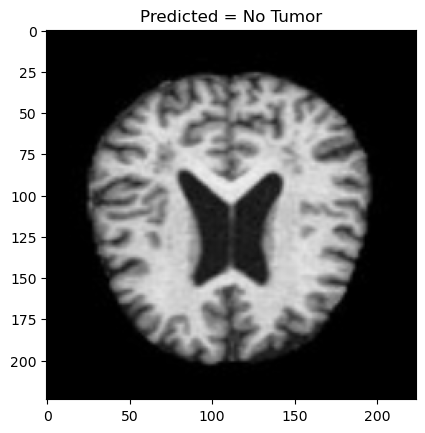

In [118]:
Make_Prediction()

***